In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# <Read in the data file>
df = pd.read_csv('/Users/christinacho/Desktop/ML projects/Phone price project /data/phone_price.csv')

In [242]:
# <Data Dictionary>

#1.battery_power - phone battery capacity 
#2.blue - the presence of bluetooth
#3.clock_speed - speed at which microprocessor executes instructions
#4.dual_sim - has dual sim support or not
#5.fc - front camera mega pixels 
#6.four_g - has 4G or not
#7.int_memory - internal Memory in Gigabytes
#8.m_dep - mobile Depth in cm
#9.mobile_wt - weight of mobile phone
#10.n_cores - number of cores of processor
#11.pc - primary camera mega pixels
#12.px_height - pixel resolution height
#13.px_width - pixel resolution width
#14.ram - random access memory in Megabytes
#15.sc_h - screen height of mobile in cm
#16.sc_w - screen width of mobile in cm
#17.talk_time - longest time that a single battery charges
#18.three_g - has 3G or not
#19.touch_screen - has touchscreen or not
#20.wifi - has wifi or not
#21.price_range - the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)

In [ ]:
# Objective of the project: Build an optimal machine learning model to predict a phone's price range given the phone's features 

In [4]:
# <Basic understanding of the data> 
df.info()

## The dataset consists of 2000 rows and 21 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.isnull().sum()
## There are no missing values in the dataset 

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.duplicated().sum()
## There are no duplicated rows in the dataset 

0

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [8]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
## Divide the variables into two types - categorical or numerical
cat_features = df[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen','wifi']]
num_features = df[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]       

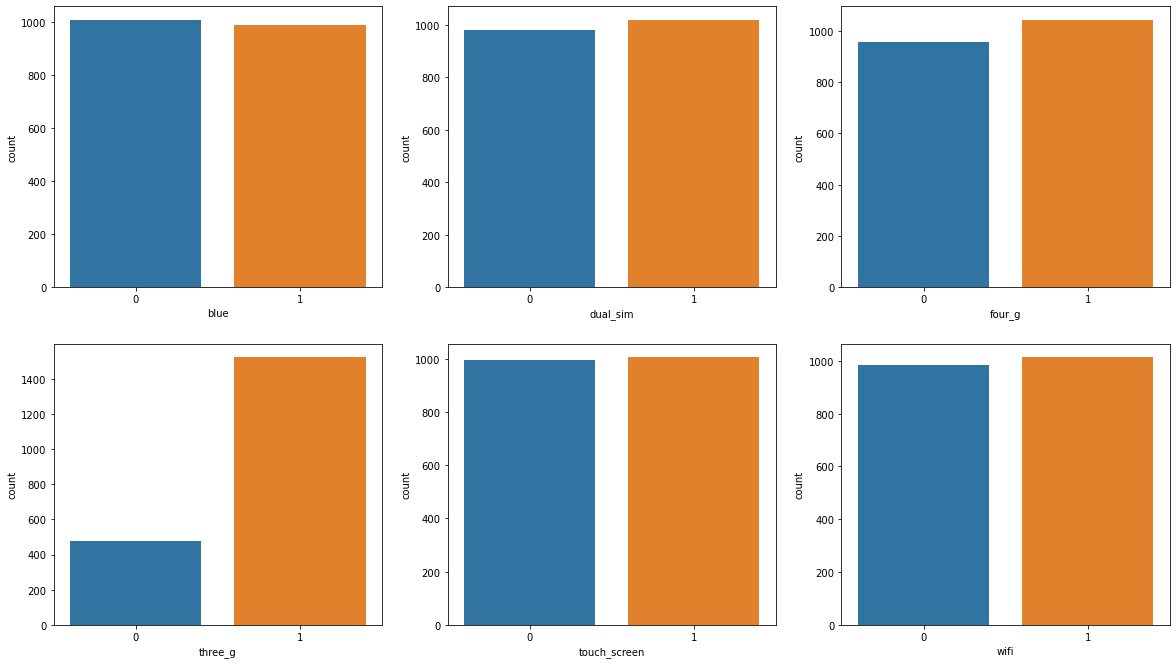

In [11]:
## Check the counts of each categorical feature 

i = 1
plt.figure(figsize = (20,30))
for feature in cat_features:
    plt.subplot(5,3,i)
    sns.countplot(x = feature , data = df)
    i +=1
    
## Observations: Most of the categorical features are balanced, except 'three_g'

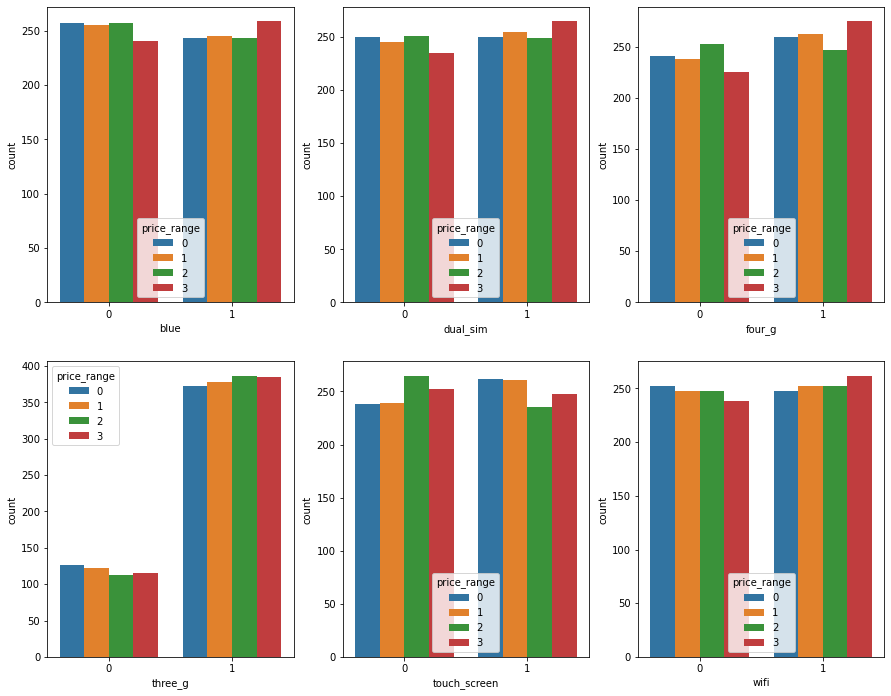

In [263]:
## Stratify the categorical features by 'price_range'
i = 1
plt.figure(figsize = (15,25))
for feature in cat_features:
    plt.subplot(4,3,i)
    sns.countplot(x = feature , data = df, hue = 'price_range')
    i +=1
## Observations: It seems that if a phone has either bluetooth, dual sim, 4G, or wifi, its price generally tends to be higher than a phone
##               that does not have the feature. 

array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'clock_speed'}>,
        <AxesSubplot:title={'center':'fc'}>,
        <AxesSubplot:title={'center':'int_memory'}>],
       [<AxesSubplot:title={'center':'m_dep'}>,
        <AxesSubplot:title={'center':'mobile_wt'}>,
        <AxesSubplot:title={'center':'n_cores'}>,
        <AxesSubplot:title={'center':'pc'}>],
       [<AxesSubplot:title={'center':'px_height'}>,
        <AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>],
       [<AxesSubplot:title={'center':'sc_w'}>,
        <AxesSubplot:title={'center':'talk_time'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

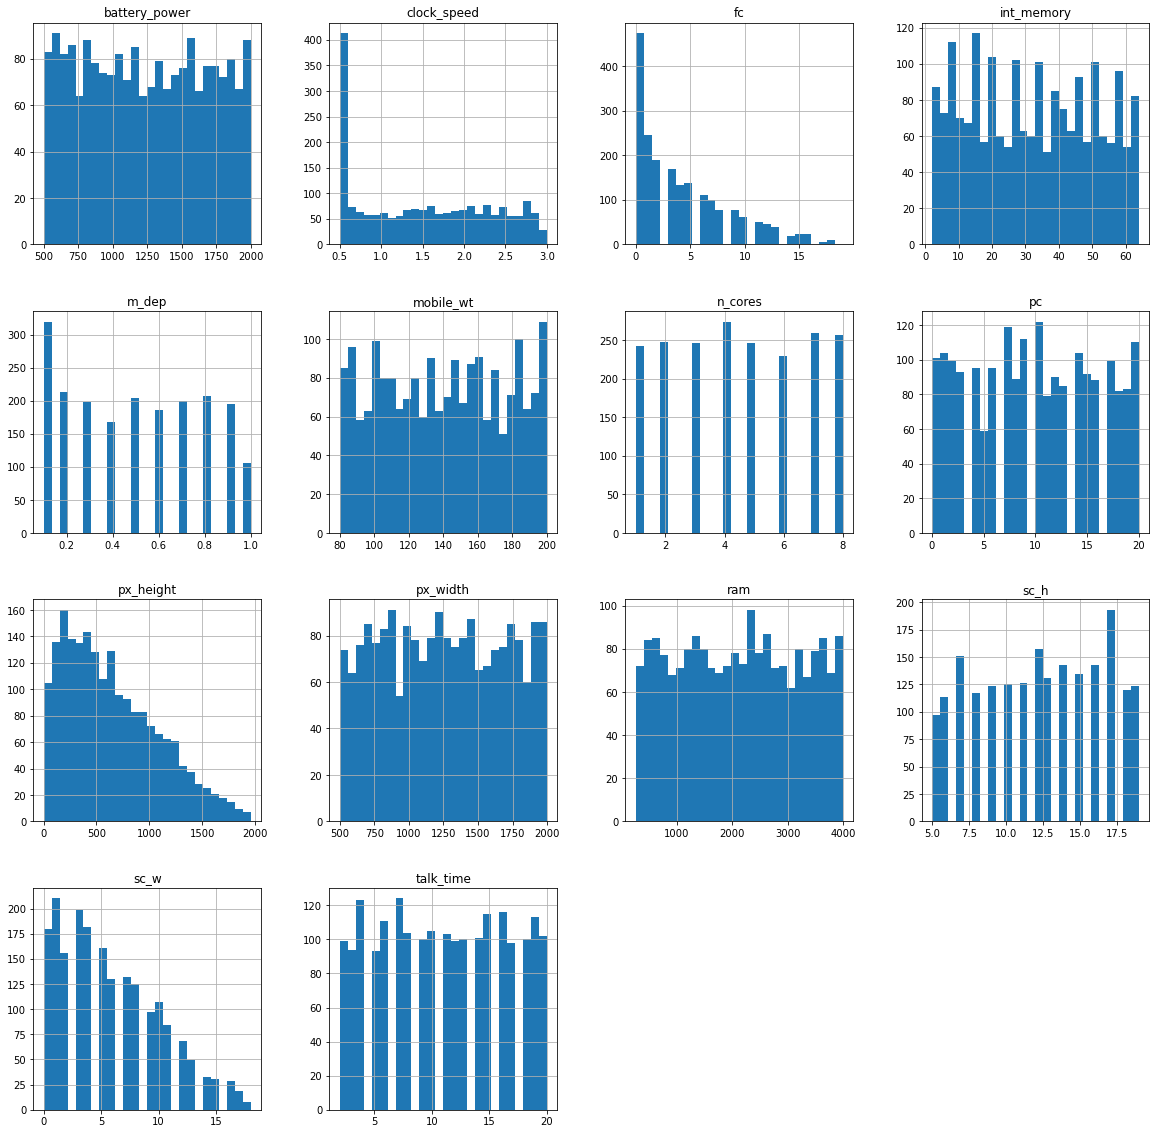

In [14]:
## Analyze numerical features as well. First, check the distribution of each feature.  

num_features.hist(figsize = (20,20), bins = 26)

## Observations: It seems that the distributions of 'fc', 'px_height', and 'sc_w' are skewed

In [252]:
## Perform log transformation on the skewed features 
df[['fc_log', 'px_height_log', 'sc_w_log']] = df[['fc', 'px_height', 'sc_w']].apply(lambda x: np.log(x+1))

<AxesSubplot:xlabel='fc_log', ylabel='Density'>

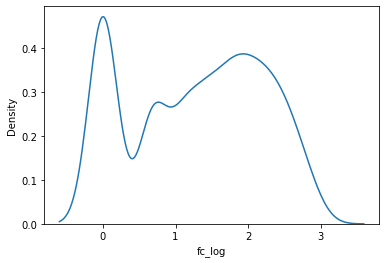

In [253]:
## Check if the transformed features show a more normal distribution 
sns.kdeplot(data = df, x = 'fc_log')

<AxesSubplot:xlabel='px_height_log', ylabel='Density'>

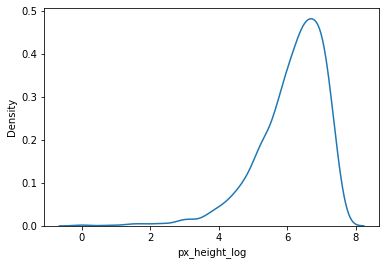

In [101]:
sns.kdeplot(data = df, x = 'px_height_log')

<AxesSubplot:xlabel='sc_w_log', ylabel='Density'>

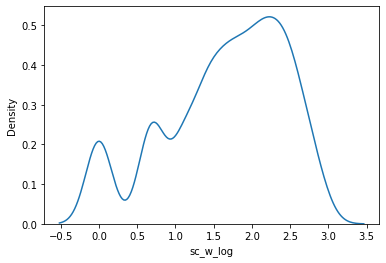

In [103]:
sns.kdeplot(data = df, x = 'sc_w_log')

In [ ]:
## Observations: They do show a more normal distribution! 

In [254]:
df.drop(['fc', 'px_height', 'sc_w'], axis = 1, inplace = True) 
## Because the log-transformed columns exist in the dataframe now, the original pre-transformed columns are dropped

In [255]:
## Update the num_features dataframe with the log-transformed features 
num_features = df[['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_width', 'ram', 'sc_h', 'talk_time', 'fc_log', 'px_height_log', 'sc_w_log']]       

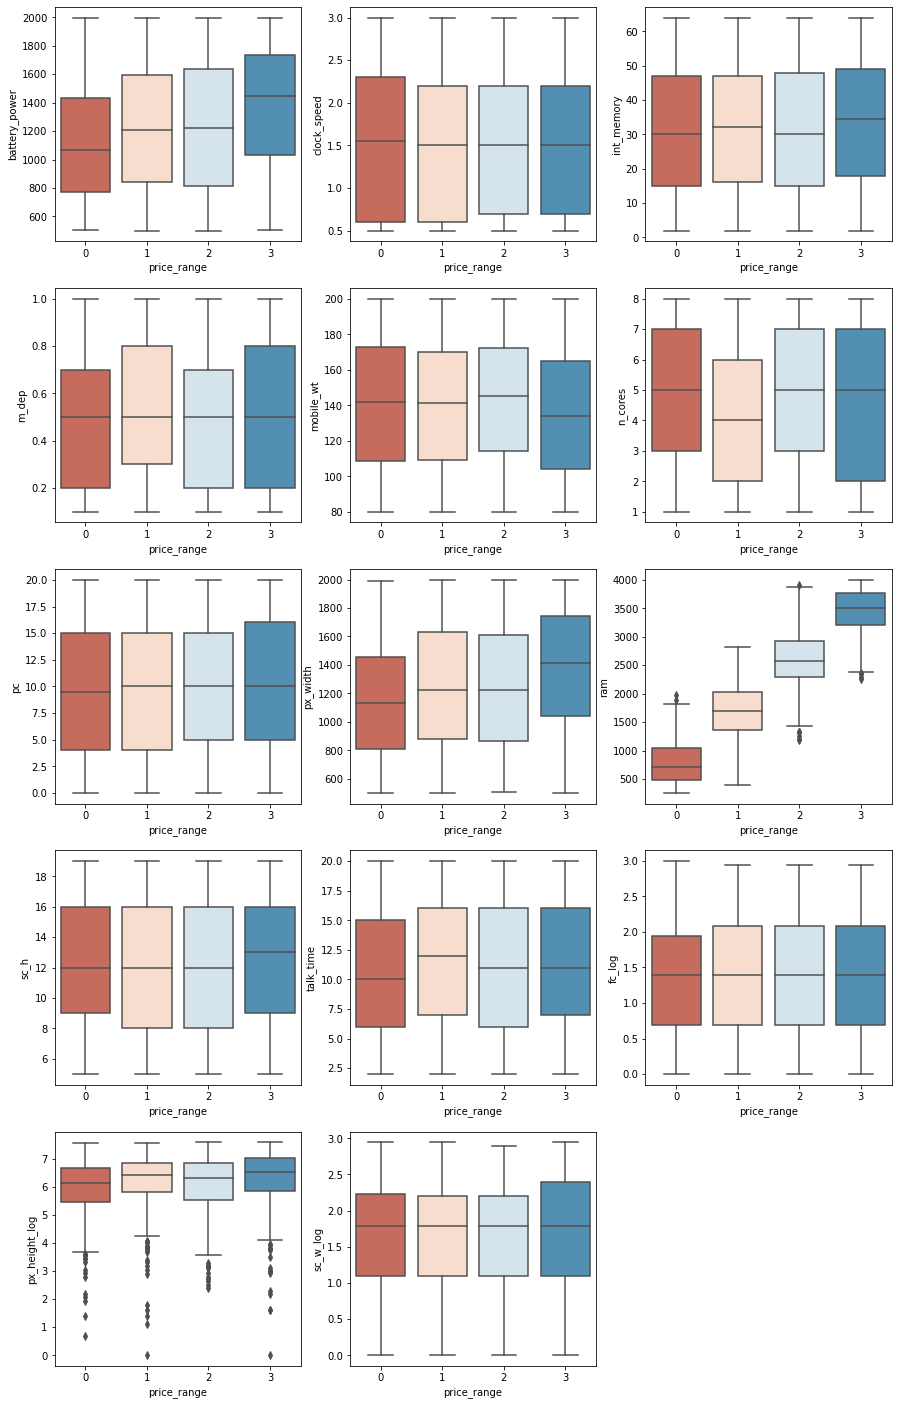

In [256]:
## Boxplots of numeric features, stratified by price range 
i = 1
plt.figure(figsize = (15,25))
for feature in num_features:
    plt.subplot(5,3,i)
    sns.boxplot(x = 'price_range' , y= feature, data = df, palette = "RdBu")
    i +=1
## Observations: There seems to be a pretty clear pattern that battery power and pixel resolution width are associated with the price 
##               range of a phone. In particular, there can be seen a clear association between ram and price range.   

<AxesSubplot:>

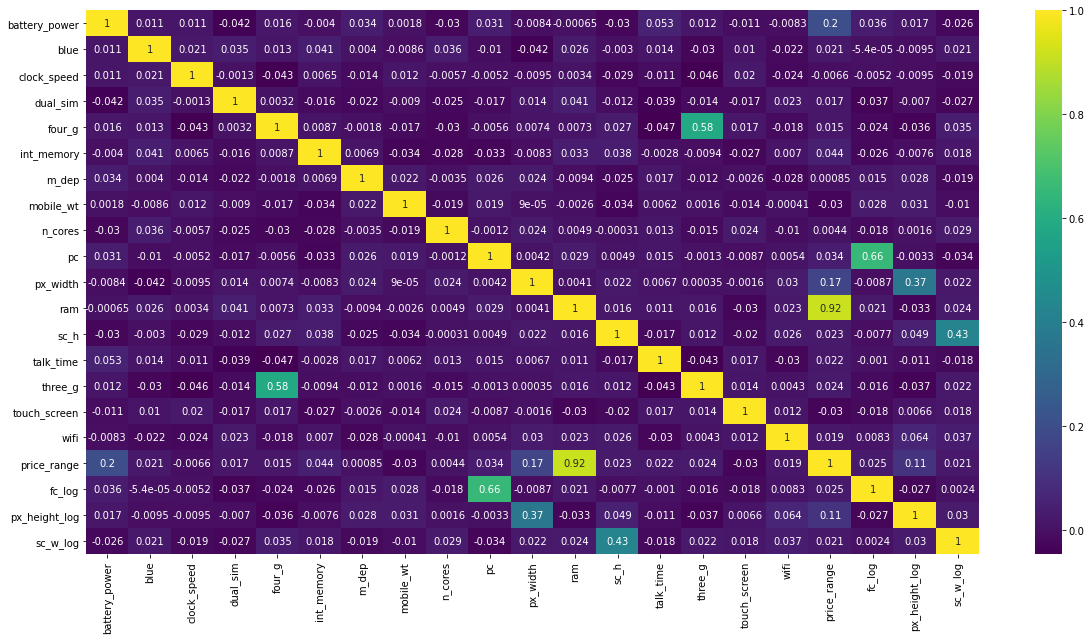

In [126]:
## Correlation plot of all the features, including the outcome variable 

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis') 

## Observations: It seems that 'fc_log' and 'pc', 'px_width' and 'px_height_log', 'sc_h' and 'sc_w_log', and 'four_g' and 'three_g' are
##               quite correlated with one another. These correlations make sense because it is understandable that a phone that has
##               certain megapixels for its front camera would have similar megapixels for its primary camera as well.  
##               It is also understandable that a phone's pixel resolution height and pixel resolution width can be correlated with 
##               each another, as well as a phone's screen height and width. Lastly, it is also likely that phones that have 4G can 
##               also have 3G. Since each of these correlations suggest that one of the features in each pair might be redundant, 
##               I will check which one of each pair would be more important to keep. I will do so by keeping the feature that has a 
##               stronger correlation with the outcome variable. 


In [116]:
## Check the correlations between all the independent features and the outcome variable 
np.abs(df.corr()['price_range']).sort_values(ascending= False)[1:]

## It is apparent that 'ram','battery_power', and 'px_width' have the strongest correlations with the outcome variable.

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height_log    0.107654
int_memory       0.044435
pc               0.033599
touch_screen     0.030411
mobile_wt        0.030302
fc_log           0.024887
three_g          0.023611
sc_h             0.022986
talk_time        0.021859
sc_w_log         0.021309
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
clock_speed      0.006606
n_cores          0.004399
m_dep            0.000853
Name: price_range, dtype: float64

In [ ]:
## I can see that among the correlated pairs of indepedent features, 'pc' might be more important than 'fc_log', 'px_width' might be 
## more important than 'px_height_log', 'sc_h' might be more important than 'sc_w_log', and 'three_g' might be more important than 
## 'four_g'. Thus, these less important features are dropped.  

In [127]:
df2= df.drop(['fc_log', 'px_height_log', 'sc_w_log', 'four_g'], axis =1)

<AxesSubplot:>

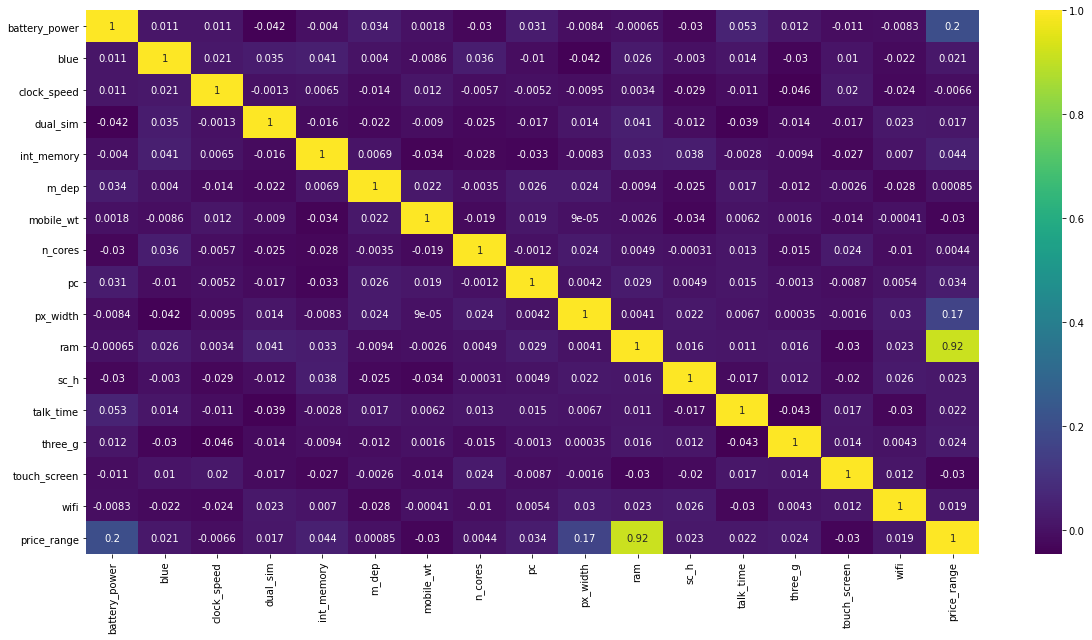

In [133]:
## Check the correlations between all the features after dropping these four features 

plt.figure(figsize = (20,10))
sns.heatmap(df2.corr(), annot = True, cmap= 'viridis')

<AxesSubplot:xlabel='price_range', ylabel='count'>

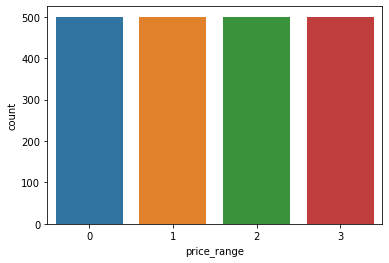

In [134]:
## Check whether the outcome variable is balanced 

sns.countplot(data = df2, x = 'price_range')

## Observations: The variable seems to be balanced 

In [200]:
# <Fit Machine Learning models with default parameters first and then compare them>

## Define X and Y
X= df2.drop('price_range', axis =1)
y= df['price_range']

## Split the dataset into train and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

## Scale the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test) 

In [201]:
# KNN 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_model = KNeighborsClassifier()
cv = cross_val_score(knn_model, scaled_X_train, y_train, cv= 5, scoring = 'accuracy')

cv.mean()

0.516875

In [202]:
# SVM 

from sklearn.svm import SVC 

svm_model = SVC()
cv = cross_val_score(svm_model, scaled_X_train, y_train, cv = 5, scoring = 'accuracy')

cv.mean()

0.8481249999999999

In [203]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB()
cv= cross_val_score(NB_model, scaled_X_train, y_train, cv= 5, scoring = 'accuracy')

cv.mean()

0.78

In [204]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
cv = cross_val_score(RF_model, scaled_X_train, y_train, cv = 5, scoring = 'accuracy')

cv.mean()

0.851875

In [ ]:
## Random forest and SVM showed the highest accuracies. 
## Now, I will see if I can improve these models by tuning them 

In [169]:
# Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 150, 200], 
              'max_depth': range(20, 50),
              'bootstrap': [True, False]}

grid = GridSearchCV(RF_model, param_grid)
grid.fit(scaled_X_train, y_train)

grid.best_score_

0.8625

In [238]:
grid.best_params_ #### the best parameters selected for this model

{'bootstrap': True, 'max_depth': 38, 'n_estimators': 100}

In [205]:
# SVM

param_grid = {'C':[0.001,0.01,0.1, 0.5, 1],
              'gamma':['scale','auto'], 
              'kernel' : ['linear', 'rbf']}

grid1 = GridSearchCV(svm_model, param_grid)
grid1.fit(scaled_X_train, y_train)

grid1.best_score_

0.9

In [206]:
grid1.best_params_ ## the best parameters selected for this model 

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [207]:
## Since SVM showed a higher accuracy value, SVM is selected as the final model. I will now check its test accuracy.  

y_pred = grid1.predict(scaled_X_test)

In [212]:
from sklearn.metrics import classification_report, plot_confusion_matrix

print(classification_report(y_test, y_pred)) #### the accuracy is 0.91

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       105
           1       0.87      0.91      0.89        91
           2       0.85      0.86      0.85        92
           3       0.93      0.92      0.92       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



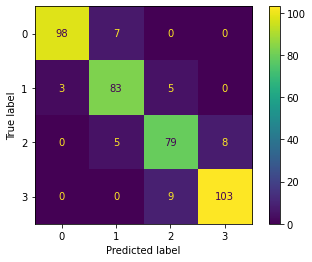

In [213]:
plot_confusion_matrix(grid1, scaled_X_test, y_test)